## <font color='blue'>4. Signal Generation</font>
### <font color='blue'>Problem</font>

#### 1. Try to figure out what frequencies of the sin wave.
https://www.youtube.com/watch?v=K4sGA5wogVU \ <br>

### <font color='green'>Next: Noise</font>

## <font color='blue'>4-1 Basic Concept</font>
We will discuss how to generate the periodic and non-periodic signals 

#### 訊號生成(Signal Generation)技術是指使用訊號模型(Signal Models)產生數位訊號的技術。由於是透過人工的方式產生，因此也稱為訊號合成(Signal Synthesis)技術。

## <font color='blue'>4-2 Periodic Signals</font>

Periodic Signal(週期性訊號) follows：
\begin{equation}
x(t)=x(t+T).  \tag{4.1} 
\end{equation}
where $T$ is Period.

### 4-2-1 sinusoids 

For example, a sin wave can be defined as:\
\begin{equation}
x(t)=A\cos (2\pi (f)t). \tag{4.2}
\end{equation}
where $A=1$, and $f=5$ Hz. Please show the wave in $t=0 \sim 1$sec.

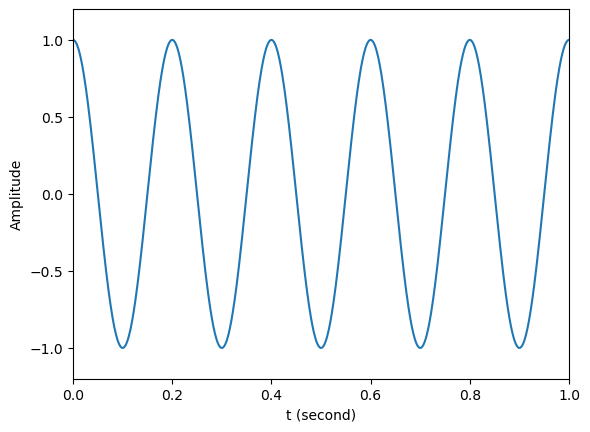

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace( 0, 1, 1000, endpoint = False )	
x = 1 * np.cos( 2 * np.pi * 5 * t )					
plt.plot( t, x )								
plt.xlabel( 't (second)' )
plt.ylabel( 'Amplitude' )
plt.axis( [ 0, 1, -1.2, 1.2 ] )

plt.show( )

In [24]:
import numpy as np
import wave
import struct

file = r"./Waves/sinusoids.wav"		# 

amplitude = 15000           # 
frequency = 512			# 
duration = 5				# in sec
fs = 44100				   	#
num_samples = duration * fs
 
num_channels = 1			# 
sampwidth = 2				# 
num_frames = num_samples	# 
comptype = "NONE"		   	# 
compname = "not compressed" # 

t = np.linspace( 0, duration, num_samples, endpoint = False )
fan = np.linspace( 1, 0, num_samples, endpoint = False )
x =  amplitude * (np.cos( 2 * np.pi * fan * frequency * t ) +  0.5* np.cos( 2 * np.pi * 2* fan* frequency * t ))

wav_file = wave.open( file, 'wb' )
wav_file.setparams(( num_channels, sampwidth, fs, num_frames, comptype, compname )) 

for s in x :
    wav_file.writeframes( struct.pack( 'h', int ( s ) ) )

wav_file.close( ) 

### 4-2-2 square 

方波(Square)可以定義為：

\begin{equation}
x(t)=A\cdot sgn(\sin (\omega t))=A \cdot sgn (\sin(2\pi ft)). \tag{4.3}
\end{equation}

where，A is amplitude, $\omega$is angular frequency, $f$ is Frequency.\
Sgn(.) is called sign function defined as:

\begin{equation}
  sgn(x) =
    \begin{cases}
      1, & \text {if}\; x>0\\
      0, & \text {if}\; x=0\\
      -1, & \text {otherwise}
    \end{cases}.        \tag{4.4}
\end{equation}

In [3]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

amplitude = 0.8           # 
frequency = 5			# 

t = np.linspace( 0, 1, 5000 )			#
x = amplitude*signal.square( 2 * np.pi * frequency * t )	#

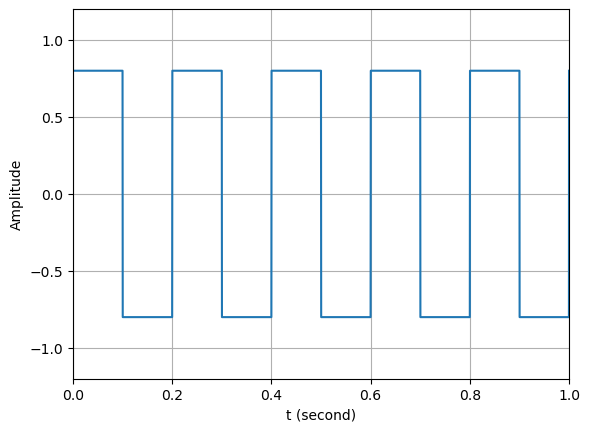

In [4]:
plt.plot( t, x )						# 
plt.xlabel( 't (second)' )
plt.ylabel( 'Amplitude' )
plt.axis( [ 0, 1, -1.2, 1.2 ] )
plt.grid()
plt.show( )

### 4-2-3 Sawtooth Wave 

In [5]:
x = amplitude * signal.sawtooth( 2 * np.pi * frequency * t )

scipy.signal.sawtooth(t, width=1) <br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sawtooth.html#scipy.signal.sawtooth
The sawtooth waveform has a period 2*pi, rises from -1 to 1 on the interval 0 to width*2*pi, then drops from 1 to -1 on the interval width*2*pi to 2*pi. width must be in the interval [0, 1].

### 4-2-4 Triangle Wave 

In [6]:
x = amplitude * signal.sawtooth( 2 * np.pi * frequency * t, 0.5 ) 

### 4-2-5 Harmonic Wave 

諧波(Harmonic)可以定義為：

\begin{equation}
x(t)=\sum_{k=1}^N A_k \cdot \cos(2\pi f_k t).  \tag{4.5}
\end{equation}

其中，$A_k$為第$k$個弦波的振幅，$f_k$為第$k$個弦波的頻率，符合下列公式：
    
\begin{equation}
f_k=k \cdot f_1, k=1, 2,..., N.  \tag{4.6} 
\end{equation}.  

$f_1$稱為基礎頻率(Fundamental Frequency)

若基礎弦波是定義為：
    
\begin{equation}
\begin{split}
x_1(t)=A_1\cos (2\pi\cdot f_1 \cdot t) \\
x_2(t)=A_2\cos (2\pi\cdot f_2 \cdot t)
\end{split}
\end{equation}

其中，$A_1 = A_2 = 1$, 且基礎頻率$f_1 = 2$，$f_2=4$ Hz。\
兩個弦波加總後即可產生諧波，其波形。


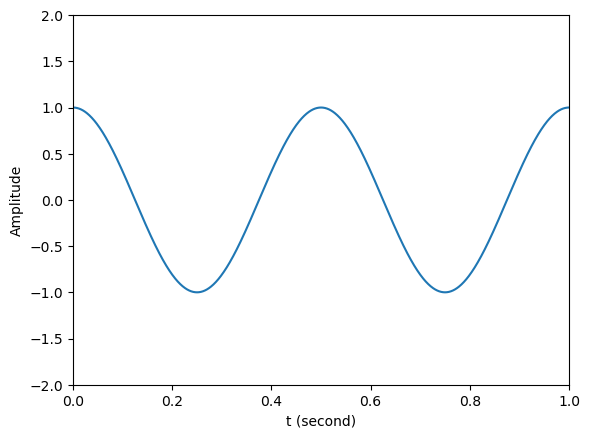

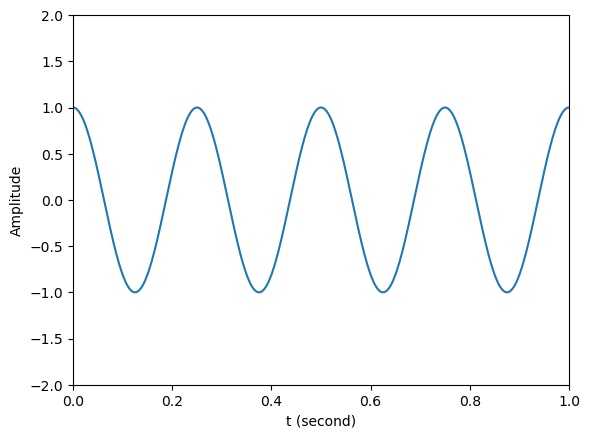

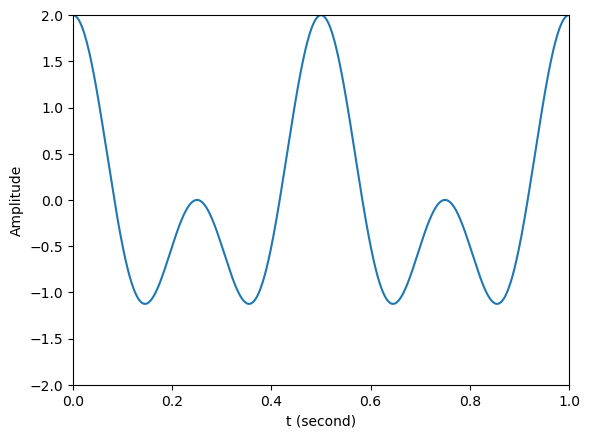

In [7]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace( 0, 1, 1000, endpoint = False )	# 

f1 = 2 											# 
x1 = np.cos( 2 * np.pi * f1 * t )	  			# 
x2 = np.cos( 2 * np.pi * 2 * f1 * t )			# 
x = x1 + x2										# 

plt.figure( 1 )									# 
plt.plot( t, x1 )
plt.xlabel( 't (second)' )
plt.ylabel( 'Amplitude' )
plt.axis( [ 0, 1, -2, 2 ] )

plt.figure( 2 )
plt.plot( t, x2 )
plt.xlabel( 't (second)' )
plt.ylabel( 'Amplitude' )
plt.axis( [ 0, 1, -2, 2 ] )

plt.figure( 3 )
plt.plot( t, x )
plt.xlabel( 't (second)' )
plt.ylabel( 'Amplitude' )
plt.axis( [ 0, 1, -2, 2 ] )

plt.show( )

### 4-2-6 Beat Wave 

節拍波(Beat Wave)可以定義為：
 
\begin{equation}
x(t)=A\cos (2\pi f_1 t) \cdot \cos (2\pi f_2 t). \tag{4.7}
\end{equation}

其中，$A$為振幅，$f_1$為低頻訊號的頻率(Hz)，$f_2$為高頻訊號的頻率(Hz)。

Let $A=1$, $f_1=20$ Hz and $f_2=200$ Hz, time ranged $t=0 \sim 1$sec.

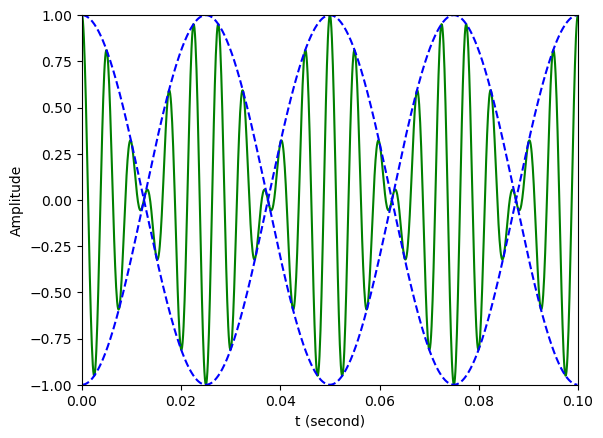

In [8]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace( 0, 0.1, 1000, endpoint = False )	# 

f1 = 20												# 
f2 = 200											# 
x = np.cos( 2 * np.pi * f1 * t ) * np.cos( 2 * np.pi * f2 * t )
envelop1 =  np.cos( 2 * np.pi * f1 * t )			# 
envelop2 = -np.cos( 2 * np.pi * f1 * t )

plt.plot( t, x, '-', color = 'g'  )								# #
plt.plot( t, envelop1, '--', color = 'b' )
plt.plot( t, envelop2, '--', color = 'b' )
plt.xlabel( 't (second)' )
plt.ylabel( 'Amplitude' )
plt.axis( [ 0, 0.1, -1, 1 ] )

plt.show( )

由圖可發現，低頻訊號的頻率為20Hz，構成訊號的包絡(Envelope)；高頻訊號的頻率為200 Hz，稱為載波訊號(Carrier Signal)

### 4-2-7 Beat Wave 

振幅調變(Amplitude Modulation)，簡稱AM，可以定義為：
 
\begin{equation}
y(t)=x(t)\cdot \cos (2\pi f_c t).  \tag{4.8} 
\end{equation}    
    
其中，$x(t)$為輸入訊號；$f_c$稱為載波頻率(Carrier Frequency)。


## <font color='blue'>4-3 Non-Periodic Signals</font>

### 4-3-1 淡入(Fade-In)或淡出(Fade-Out)

是指隨著時間，振幅(Amplitude)逐漸增加(或減少)的訊號。
 
\begin{equation}
y(t) = a(t) \cdot x(t) = \frac{1}{t} \cdot \cos (2\pi f_c t).  \tag{4.9} 
\end{equation}    

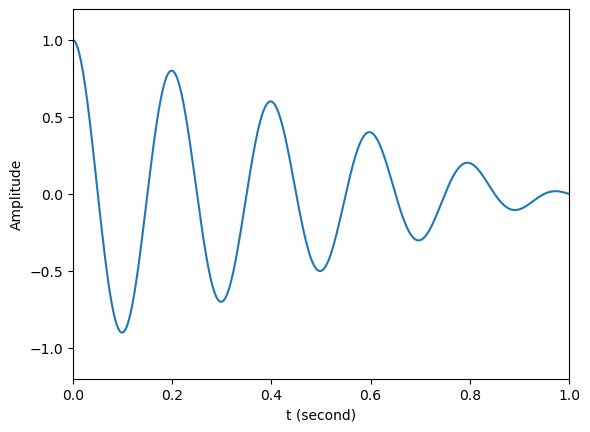

In [17]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace( 0, 1, 1000, endpoint = False )	# 

x = np.cos( 2 * np.pi * 5 * t )					# 
a = np.linspace( 1, 0, 1000, endpoint = False ) #  
y = x * a                                       # 

plt.plot( t, y )								# 
plt.xlabel( 't (second)' )
plt.ylabel( 'Amplitude' )
plt.axis( [ 0, 1, -1.2, 1.2 ] )

plt.show( )

### 4-3-2 啁啾訊號(Chirp)

是指隨著時間，其頻率逐漸增加(或減少)的訊號，

分別稱為Up-Chirp(或Down-Chirp)。在某些DSP技術應用中，啁啾訊號也經常稱為掃描訊號(Sweep Signal)。
 
\begin{equation}
y(t) = \cos (2\pi (f_c\cdot t) t) = \cos (2 \pi f_c t^2)   \tag{4.10} 
\end{equation}   

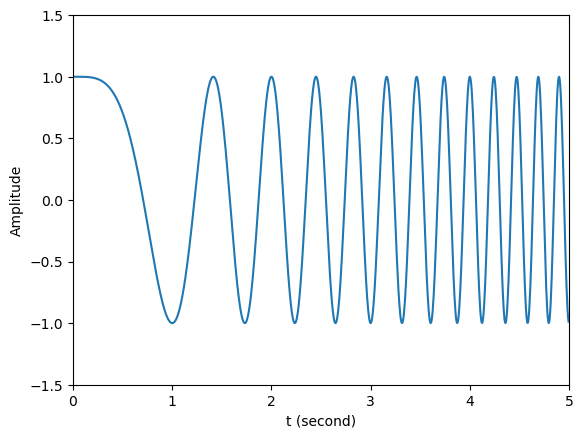

In [10]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

t = np.linspace( 0, 5, 1000, endpoint = False )	#

# scipy.signal.chirp(t, f0, t1, f1, method='linear', phi=0, vertex_zero=True)
# f0 = 0, t1 = 5, f1 = 5, linear increasing.

x = signal.chirp( t, 0, 5, 5, 'linear' )		# 

plt.plot( t, x )								# 
plt.xlabel( 't (second)' )
plt.ylabel( 'Amplitude' )
plt.axis( [ 0, 5, -1.5, 1.5 ] )

plt.show( )

## <font color='red'> Final Problem:</font>
Try to see the effects of modulation with $f_c=1 k$Hz of your voices.

### Record audio

In [11]:
import pyaudio
import wave

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "output.wav"
#----------------------------------------------------------
p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("* done recording")
stream.stop_stream()
stream.close()
p.terminate()

#----------------------------------------------------------
wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


### Play audio

In [12]:
import pyaudio
import wave
import sys

#----------------------------------------------------------
CHUNK = 1024

# if len(sys.argv) < 2:
#     print("Plays a wave file.\n\nUsage: %s filename.wav" % sys.argv[0])
#     sys.exit(-1)

wf = wave.open('output.wav', 'rb')

p = pyaudio.PyAudio()

stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                channels=wf.getnchannels(),
                rate=wf.getframerate(),
                output=True)

data = wf.readframes(CHUNK) # read stream by frames

while data != b'':
    stream.write(data)
    data = wf.readframes(CHUNK)

#----------------------------------------------------------
stream.stop_stream()
stream.close()

p.terminate()

[Ref] Generating electrocardiogram signals by deep learning
https://www.sciencedirect.com/science/article/pii/S0925231220306615